### **This note book is for learning and practicing Random Forest**

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [22]:
df.describe(include='object')

,species
count,150
unique,3
top,setosa
freq,50


In [23]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(1)

In [26]:
df1= df.drop_duplicates()

In [27]:
df1.duplicated().sum()

np.int64(0)

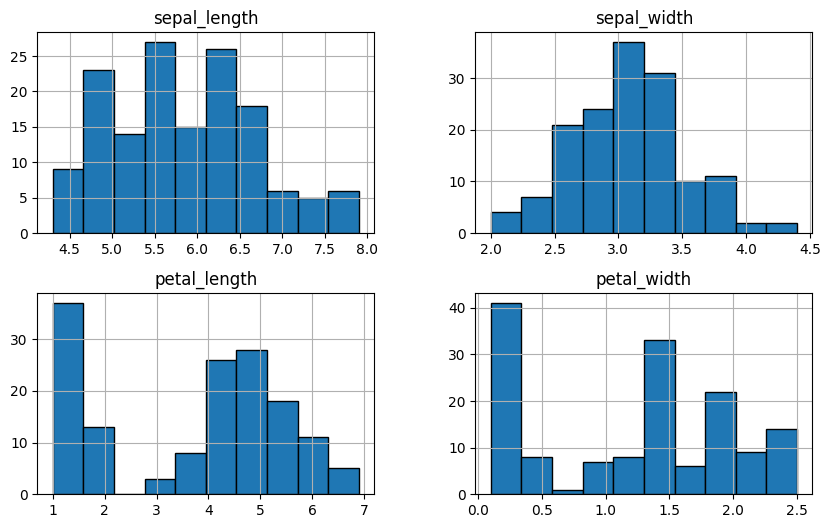

In [28]:
df1.hist(figsize=(10,6), bins=10, edgecolor='k')
plt.show()

In [29]:
df['species'].replace({'setosa':1, 'versicolor': 2, 'virginica':3}, inplace=True)

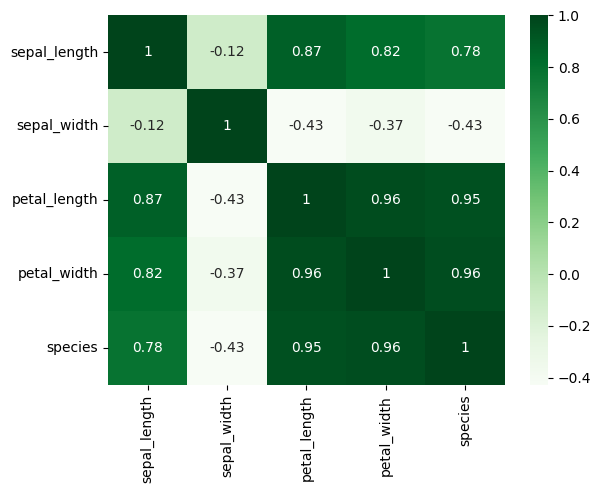

In [31]:
corr= df.corr(method= 'pearson')
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [32]:
X= df1.drop('species', axis=1)
y=df1['species']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred= model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
acc= accuracy_score(y_test, y_pred)*100
Classification_Report= classification_report(y_test, y_pred)

print("Accuracy is: \n", acc)
print("Classification Report:\n", Classification_Report)

Accuracy is: 
 100.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
import joblib

joblib.dump(model, 'Species_RF.pkl')

['Species_RF.pkl']

In [38]:
RF_model=joblib.load('Species_RF.pkl')

In [39]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
df1.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [45]:
new_data= [[6.3, 3.2, 5.3, 2.4]]
prediction= RF_model.predict(new_data)
prediction[0]

'virginica'